In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

## Lesson 6 - Pretrained Model
 - 이번 실습 자료에서는 강의시간에 다루었던 torchvision 을 사용하여 pretrained 모델을 사용하는 방법에 대해 실습하겠습니다.
 - torchvision 의 pretrained model 리스트는 다음과 같습니다
 
 [List of torchvision models](https://github.com/pytorch/vision/blob/master/torchvision/models/__init__.py#L1-L14)
```
from .alexnet import *
from .resnet import *
from .vgg import *
from .squeezenet import *
from .inception import *
from .densenet import *
from .googlenet import *
from .mobilenet import *
from .mnasnet import *
from .shufflenetv2 import *
from . import segmentation
from . import detection
from . import video
from . import quantization
```

#### 가장 기본이라고 할 수 있는 Alextnet 모델 아키텍쳐를 사용해보겠습니다.

In [2]:
from torchvision.models import alexnet
model = alexnet()
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### Alexnet 의 pretrained 버전 또한 쉽게 불러올 수 있습니다.

In [3]:
model = alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### torchvision 에서 해당 모델을 어떤 식으로 구현하였는지 직접 확인해보면 매우 도움이 많으 됩니다.
Example:
[source code](https://github.com/pytorch/vision/blob/master/torchvision/models/alexnet.py#L15-L50)
```
class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
```

#### 다른 모델들( e.g. vgg19, resnet18) 도 같은 방법으로 손 쉽게 사용할 수 있습니다.

In [4]:
from torchvision.models import vgg19_bn
model = vgg19_bn(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#### Pretrained 모델을 내 태스크에 맞게 어떻게 사용할 수 있나요?
 - Trochvision 모델들은 보통 feature-extraction 파트, task-specific 파트로 크게 두 가지로 구성되어 있습니다.
 - Task specific 파트는 모델의 태스크(이미지 분류, 객체 인식 등) 에 따라 모두 다릅니다.
 - 심지어 같은 이미지 분류 안에서도, 어떤 데이터셋으로 pretrain 하였느냐에 따라 다를 수 있습니다.
 - 따라서, 우리도 우리 테스크에 맞게 task specific 파트는 새로 정의하여 사용하여야 합니다.

 - 주로 이미지넷 데이터셋을 사용하여 pretrain 을 하기에 output_dim=1000 인 경우가 많습니다.
 - 따라서 우리 태스크의 클래스 갯수(18)에 맞게 재정의하여 사용할 수 있습니다.

In [5]:
num_classes = 18
model = vgg19_bn(pretrained=True)
model.classifier = nn.Sequential(
    nn.Linear(512 * 7 * 7, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(True),
    nn.Dropout(),
    nn.Linear(4096, num_classes),
)

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#### Weight Freeze
 - Weight freeze 란 해당 모듈의 graident 는 역전파 하지 않아 학습을 하지 않는다는 의미입니다.
 - 예를 들어, 우리가 하려는 태스크가 pretrain 한 태스크와 매우 유사하다면, feature 파트는 freeze 하여 학습하지 않고 새로 정의한 task specific 파트만 학습하는 것이 좋은 방법일 수 있습니다.
 - weight freeze 는 `requires_grad` 를 사용하여 쉽게 구현할 수 있습니다. 

In [6]:
# Freeze only feauture parts
model.features.requires_grad_(False)
for param, weight in model.named_parameters():
    print(f"param {param:20} required gradient? -> {weight.requires_grad}")

param features.0.weight    required gradient? -> False
param features.0.bias      required gradient? -> False
param features.1.weight    required gradient? -> False
param features.1.bias      required gradient? -> False
param features.3.weight    required gradient? -> False
param features.3.bias      required gradient? -> False
param features.4.weight    required gradient? -> False
param features.4.bias      required gradient? -> False
param features.7.weight    required gradient? -> False
param features.7.bias      required gradient? -> False
param features.8.weight    required gradient? -> False
param features.8.bias      required gradient? -> False
param features.10.weight   required gradient? -> False
param features.10.bias     required gradient? -> False
param features.11.weight   required gradient? -> False
param features.11.bias     required gradient? -> False
param features.14.weight   required gradient? -> False
param features.14.bias     required gradient? -> False
param feat

#### Weight initialization 
 - weight 초기화는 종종 모델의 성능에 critical 한 영향을 줍니다.
 - 하지만 만약 pretrained 모델을 사용한다면 pretrained 부분은 초기화를 하지 말고, 재정의한 task specific 파트만 초기화하여야 합니다.

In [7]:
import torch.nn.init as init

def initialize_weights(model):
    """
    Initialize all weights using xavier uniform. 
    For more weight initialization methods, check https://pytorch.org/docs/stable/nn.init.html
    """
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            init.xavier_uniform_(m.weight.data)
            if m.bias is not None:
                m.bias.data.zero_()
        elif isinstance(m, nn.BatchNorm2d):
            m.weight.data.fill_(1)
            m.bias.data.zero_()
        elif isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 0.01)
            m.bias.data.zero_()

#### pretrained 모델을 가져와 가장 앞단 layer 의 weight 분포를 봐봅시다

(array([1.00e+00, 0.00e+00, 1.00e+01, 3.50e+01, 1.58e+02, 1.47e+03,
        4.00e+01, 1.30e+01, 0.00e+00, 1.00e+00]),
 array([-1.644177  , -1.3200787 , -0.99598044, -0.67188215, -0.3477839 ,
        -0.02368563,  0.30041263,  0.6245109 ,  0.9486092 ,  1.2727075 ,
         1.5968057 ], dtype=float32),
 <BarContainer object of 10 artists>)

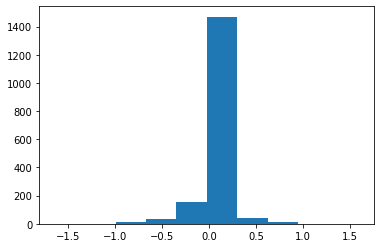

In [8]:
import matplotlib.pyplot as plt

model = vgg19_bn(pretrained=True)

# Before initialize weights
plt.hist(model.features[0].weight.detach().numpy().reshape(-1))  # weight distribution for first conv weight

#### weight 초기화 후 분포를 봐 봅시다
 - `xavier_uniform` 으로 초기화하여 웨이트들이 uniform 한 분포를 가지게 되었습니다.

(array([180., 165., 168., 165., 167., 172., 167., 190., 189., 165.]),
 array([-0.09949287, -0.07956971, -0.05964655, -0.03972339, -0.01980022,
         0.00012294,  0.0200461 ,  0.03996926,  0.05989242,  0.07981558,
         0.09973875], dtype=float32),
 <BarContainer object of 10 artists>)

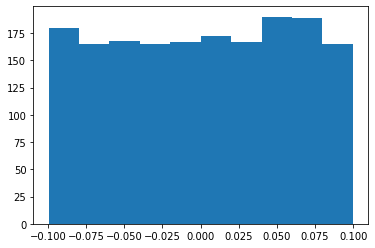

In [9]:
model = vgg19_bn(pretrained=True)

# Initalize all weights
initialize_weights(model.features)

# After initialize weights
plt.hist(model.features[0].weight.detach().numpy().reshape(-1))

#### task specific 한 부분만 초기화하엿습니다
 - feature extraction 파트는 초기화가 되지 않은 것은 확인할 수 있습니다.

(array([1.00e+00, 0.00e+00, 1.00e+01, 3.50e+01, 1.58e+02, 1.47e+03,
        4.00e+01, 1.30e+01, 0.00e+00, 1.00e+00]),
 array([-1.644177  , -1.3200787 , -0.99598044, -0.67188215, -0.3477839 ,
        -0.02368563,  0.30041263,  0.6245109 ,  0.9486092 ,  1.2727075 ,
         1.5968057 ], dtype=float32),
 <BarContainer object of 10 artists>)

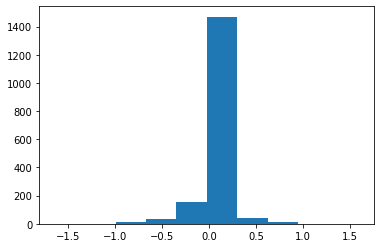

In [10]:
model = vgg19_bn(pretrained=True)

# Initialize only classifier part
initialize_weights(model.classifier)

# After initialize weights
plt.hist(model.features[0].weight.detach().numpy().reshape(-1))  # weight distribution for first conv weight

## Appendix (optional)

### SOTA (State Of The Art)  모델을 리서치 하는 방법
- timm
- paper with code

## timm (pyTorch IMage Models)

PyTorch Image Models (timm) is a collection of image models, layers, utilities, optimizers, schedulers, data-loaders / augmentations, and reference training / validation scripts that aim to pull together a wide variety of SOTA models with ability to reproduce ImageNet training results.

#### References
https://github.com/rwightman/pytorch-image-models#introduction

https://fastai.github.io/timmdocs/

https://rwightman.github.io/pytorch-image-models/

In [11]:
!pip install timm

     |################################| 287 kB 133 kB/s eta 0:00:01


#### Timm 을 사용하여 pretrained 모델 불러오기

In [11]:
import timm

m = timm.create_model('mobilenetv3_large_100', pretrained=True)
m.eval()

MobileNetV3(
  (conv_stem): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): HardSwishMe()
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
        (conv_pw): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(

#### Timm 에서 사용가능한 pretrained 모델 목록

In [12]:
import timm
from pprint import pprint
model_names = timm.list_models(pretrained=True)
pprint(model_names)

['adv_inception_v3',
 'cspdarknet53',
 'cspresnet50',
 'cspresnext50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dm_nfnet_f0',
 'dm_nfnet_f1',
 'dm_nfnet_f2',
 'dm_nfnet_f3',
 'dm_nfnet_f4',
 'dm_nfnet_f5',
 'dm_nfnet_f6',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet269d',
 'ecaresnetlight',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_lite0',
 'ens_adv_inception_resnet_v2',
 'ese_vovnet19b_dw',
 'ese_vovnet39b',
 'fbnetc_100',
 'gernet_

#### 다음과 같은 방법을 통해서 원하는 모델을 찾는 것도 가능합니다

In [13]:
import timm
from pprint import pprint
model_names = timm.list_models('*resne*t*')
pprint(model_names)

['cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'ecaresnet26t',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet50t',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnet200d',
 'ecaresnet269d',
 'ecaresnetlight',
 'ecaresnext26t_32x4d',
 'ecaresnext50t_32x4d',
 'ens_adv_inception_resnet_v2',
 'gluon_resnet18_v1b',
 'gluon_resnet34_v1b',
 'gluon_resnet50_v1b',
 'gluon_resnet50_v1c',
 'gluon_resnet50_v1d',
 'gluon_resnet50_v1s',
 'gluon_resnet101_v1b',
 'gluon_resnet101_v1c',
 'gluon_resnet101_v1d',
 'gluon_resnet101_v1s',
 'gluon_resnet152_v1b',
 'gluon_resnet152_v1c',
 'gluon_resnet152_v1d',
 'gluon_resnet152_v1s',
 'gluon_resnext50_32x4d',
 'gluon_resnext101_32x4d',
 'gluon_resnext101_64x4d',
 'gluon_seresnext50_32x4d',
 'gluon_seresnext101_32x4d',
 'gluon_seresnext101_64x4d',
 'ig_resnext101_32x8d',
 'ig_resnext101_32x16d',
 'ig_resnext101_32x32d',
 'ig_resnext101_32x48d',
 'inception_resnet_v2',
 'legacy_seresnet18',
 'legacy_seresnet

## Paper with code
 - https://paperswithcode.com/task/image-classification
 - 다양한 태스크와 데이터셋에 대한 다양한 모델들의 성능을 벤치마킹해주는 웹서비스입니다.
 - 해당 서비스를 통해 각 모델들의 성능 비교뿐 아니라 논문과 구현 코드로 forwarding 도 가능합니다.